In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import sys
import datetime
import pickle
import pyvips
from pathlib import Path

import warnings; warnings.filterwarnings('ignore')

sys.path.append('..')
# from config import CFG
# CFG = CFG()
# pd.options.display.float_format = '{:,.2f}'.format
# pd.set_option('display.max_columns', CFG.NCOLS)
# pd.set_option('display.max_rows', CFG.NROWS)

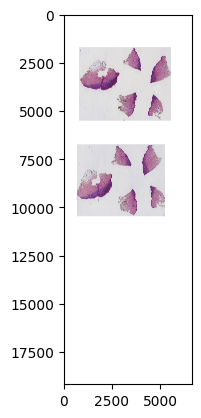

In [2]:
img = pyvips.Image.new_from_file('../data/originals/031viy0y.tif', page=4, access='sequential')
img = np.asarray(img) / 255.
plt.imshow(img)

In [2]:
history = pickle.load(open('../workspace/models/64-3-0_history.pkl', 'rb'))

In [3]:
history

{1: {'train_loss': array([0.5782692], dtype=float32),
  'train_error': array(0.17182817, dtype=float32),
  'tacc': 82.81718281718283,
  'valid_loss': 0.4365270965068464,
  'valid_error': 0.16334661354581673,
  'vacc': 83.66533864541833},
 2: {'train_loss': array([0.44617683], dtype=float32),
  'train_error': array(0.16483517, dtype=float32),
  'tacc': 83.51648351648352,
  'valid_loss': 0.42865806046235133,
  'valid_error': 0.16334661354581673,
  'vacc': 83.66533864541833},
 3: {'train_loss': array([0.43364158], dtype=float32),
  'train_error': array(0.16483517, dtype=float32),
  'tacc': 83.51648351648352,
  'valid_loss': 0.46166333996234427,
  'valid_error': 0.16334661354581673,
  'vacc': 83.66533864541833},
 4: {'train_loss': array([0.43489292], dtype=float32),
  'train_error': array(0.16483517, dtype=float32),
  'tacc': 83.51648351648352,
  'valid_loss': 0.4300986460124354,
  'valid_error': 0.16334661354581673,
  'vacc': 83.66533864541833}}

In [21]:
dfs = []
for i in history.items():
    df = pd.DataFrame(columns=list(history[i].keys()), data=list(history[i].values()), index=i)
    dfs.append(df)
df = pd.concat(dfs, axis=0)
df

TypeError: unhashable type: 'dict'

In [7]:
DATA = Path('../workspace/tiles/data/processed/48/0/')
FILES = Path('../data/lowres.csv')

In [4]:
from submission.src.dataloading import EvalDataset

In [8]:
ds = EvalDataset(DATA, FILES, 42, 64, 64, 384)

NotADirectoryError: [Errno 20] Not a directory: '../data/lowres.csv/test_metadata.csv'